# Notebook 2 - Messfehler 

### Generelles

Bibliotheken importieren

In [12]:
import matplotlib
import random
import numpy as np
import matplotlib.pyplot as plt

Daten einlesen

In [13]:
data  = np.transpose(np.loadtxt('g-Factor.txt', skiprows=1, delimiter = ','))

# die letzten paar Punkte des Datensets sollen an dieser Stelle ausgelassen werden
padding = -100 
t = data[0,:padding]
gx = data[1,:padding]
gy = data[2,:padding]
gz = data[3,:padding]

Erwarteter Wert für Erdbeschleunigung g: 
Eidgenössisches Institut für Metrologie METAS:
https://www.metas.ch/metas/de/home/dok/gravitationszonen.html

In [14]:
g_theo = 9.806 # N/kg

### Analyse der gemessenen Daten

In [15]:
# Anzahl Messpunkte in unserem Datenset
N = gz.shape[0]
print('Number of data points : {:d}'.format(N))

Number of data points : 10824


Plotten der Daten

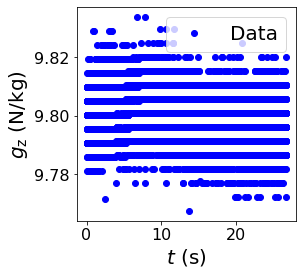

In [16]:
cm = 0.393701
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'axes.labelsize': 16})

fig = plt.figure(figsize=(10*cm, 10*cm))
ax1 = fig.add_subplot(1, 1, 1)
# Plot data
ax1.plot(t, gz, 'bo', label='Data')
# Labels and legend
ax1.set_xlabel(r'$t$ (s)', fontsize=20)
ax1.set_ylabel(r'$g_\mathrm{z}$ (N/kg)', fontsize=20)
ax1.legend(fontsize=20)

Berechne Mittelwert und Varianz

In [17]:
mean = np.sum(gz)/N
var = np.sum((gz-mean)**2)/(N-1)
print('Mean : {:0.2f} N/kg, Standard deviation : {:0.2f} N/kg'.format(mean, np.sqrt(var)))

# Alternative: Funktionen der numpy Bibliothek
# mean = np.mean(gz)
# var = np.var(gz)

Mean : 9.80 N/kg, Standard deviation : 0.01 N/kg


Erstellen eines Histogramms

In [24]:
# Bins definieren 
n_bins = 14+1 # Anahl Bins
bin_size = 0.005 # Breite Bins 
bins = np.linspace(9.76, 9.76+bin_size*(n_bins-1), n_bins)

# Initialisiere array, in dem Histogramm gespeichert werden soll
occurrence = np.zeros(n_bins)

# Iteriere über alle Messpunkte und finde heraus, in welchem Bin sie liegen
offset = np.min(bins)//bin_size + 1
for gx_i in gz:
    index = int(gx_i//bin_size-offset)
    occurrence[index] = occurrence[index] + 1

# Umrechnungsfaktor Ereignishäufigkeiten -> Wahrscheinlichkeiten
# A = N * bin_size
A = N

Plotte das Gesamtergebnis 

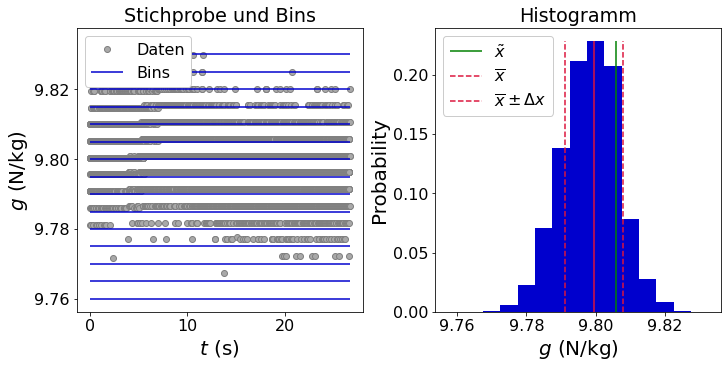

In [28]:
fig = plt.figure(constrained_layout=True, facecolor='w', figsize = (10,5))
mosaic = """
AB
"""

titles = [ r'Stichprobe und Bins', r'Histogramm' ]
ax_dict = fig.subplot_mosaic(mosaic)

# Stichprobe # Einteilung in Bins
ax_dict['A'].plot(t, gz, 'o', color = 'darkgrey', markeredgecolor = 'grey',   zorder = 1, label = "Daten")
ax_dict['A'].set_title(titles[0])
for bi, b in enumerate(bins):
    if bi == 0:
        ax_dict['A'].hlines(b, 0, t[-1],  color = 'mediumblue', zorder = 2, label = "Bins")
    else:
        ax_dict['A'].hlines(b, 0, t[-1],  color = 'mediumblue', zorder = 2)
ax_dict['A'].legend(loc = 'upper left',ncol = 1, framealpha = 1)  
ax_dict['A'].set_xlabel(r'$t$ (s)', fontsize=20)
ax_dict['A'].set_ylabel(r'$g$ (N/kg)', fontsize=20)

# Histogramm 

ax_dict['B'].bar(bins, occurrence/A, width = bin_size, color = 'mediumblue')
ax_dict['B'].set_title(titles[1])
ax_dict['B'].vlines(g_theo, 0, np.max(occurrence)/A, 'green', label = r'$\tilde{x}$')
ax_dict['B'].vlines(mean, 0, np.max(occurrence)/A, 'crimson')
ax_dict['B'].vlines(mean + np.sqrt(var), 0, np.max(occurrence)/A, 'crimson', linestyles='dashed', label = r'$\overline{x}$')
ax_dict['B'].vlines(mean - np.sqrt(var), 0, np.max(occurrence)/A, 'crimson', linestyles='dashed', label = r'$\overline{x}\pm \Delta{x}$' )
ax_dict['B'].legend(loc = 'upper left',ncol = 1, framealpha = 1)  
ax_dict['B'].set_xlabel(r'$g$ (N/kg)', fontsize=20)
ax_dict['B'].set_ylabel(r'Probability', fontsize=20)


plt.show()

Frage: Sind unsere Messpunkte normalverteilt?
Berechne Anzahl der Datenpunkte, der in einem gewissen Interval um den Mittelwert vorkommt


In [29]:
# Sum of the data points in the interval
n_sigma = 0
# Width of the interval in terms of the standard deviation
width = 1
# iterate through all bins and sum their values if they lie in the specified interval
i = 0
for b in bins:
    if (b >= (mean - np.sqrt(var) * width)) and (b <= (mean + np.sqrt(var) * width)):
        n_sigma = n_sigma + occurrence[i]
    i = i + 1
    
print('Occurences within the {:d}-sigma-interval: {:0.1f}%'.format(width,n_sigma/N*100))

Occurences within the 1-sigma-interval: 64.7%


### Generiere und Analysiere Datensatz mit höherer Auflösung

Generiere

In [30]:
N = gz.shape[0]
tnew = np.linspace(0, t[-1], N)
g_sim = np.random.normal(mean, np.sqrt(var), N)

Generiere Histogramm

In [31]:
# Number of bins
n_bins = 75+1
bin_size = 0.001
bins = np.linspace(9.76, 9.76+bin_size*(n_bins-1), n_bins)
# Initialize array holding number of data  points (occurrence) per bin
occurrence = np.zeros(n_bins)
# Calculate the offset of the occurrence-array index with respect to the floor division of the data
offset = np.min(bins)//bin_size + 1
# Iterate through all data and find the index of the occurrence-array into which the data falls.
# Then increment this array value by one. 
for gx_i in g_sim:
    index = int(gx_i//bin_size-offset)
    occurrence[index] = occurrence[index] + 1

Berechne zugehörige PDF

In [32]:
x = np.linspace(np.min(bins), np.max(bins), 101)
gauss = 1 / (np.sqrt(2 * np.pi * var)) * np.exp(-(x - mean)**2 / (2 * var))


Plotte Gesamtresultat

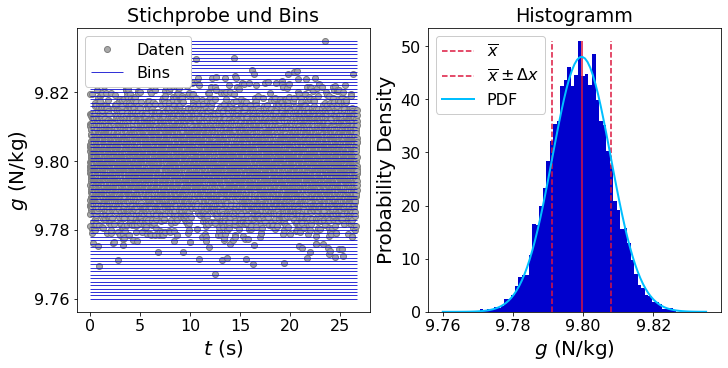

In [34]:
A =  N * bin_size

fig = plt.figure(constrained_layout=True, facecolor='w', figsize = (10,5))
mosaic = """
AB
"""

titles = [ r'Stichprobe und Bins', r'Histogramm' ]
ax_dict = fig.subplot_mosaic(mosaic)

# Stichprobe # Einteilung in Bins
ax_dict['A'].plot(tnew, g_sim, 'o', color = 'darkgrey', markeredgecolor = 'grey',   zorder = 1, label = "Daten")
ax_dict['A'].set_title(titles[0])
for bi, b in enumerate(bins):
    if bi == 0:
        ax_dict['A'].hlines(b, 0, t[-1],  color = 'mediumblue', zorder = 2, label = "Bins", lw = 0.8)
    else:
        ax_dict['A'].hlines(b, 0, t[-1],  color = 'mediumblue', zorder = 2, lw = 0.8)
ax_dict['A'].legend(loc = 'upper left',ncol = 1, framealpha = 1)  
ax_dict['A'].set_xlabel(r'$t$ (s)', fontsize=20)
ax_dict['A'].set_ylabel(r'$g$ (N/kg)', fontsize=20)

# Histogramm 

ax_dict['B'].bar(bins, occurrence/A, width = bin_size, color = 'mediumblue')
ax_dict['B'].set_title(titles[1])
#ax_dict['B'].vlines(g_theo, 0, np.max(occurrence)/A, 'green', label = r'$\tilde{x}$')
ax_dict['B'].vlines(mean, 0, np.max(occurrence)/A, 'crimson')
ax_dict['B'].vlines(mean + np.sqrt(var), 0, np.max(occurrence)/A, 'crimson', linestyles='dashed', label = r'$\overline{x}$')
ax_dict['B'].vlines(mean - np.sqrt(var), 0, np.max(occurrence)/A, 'crimson', linestyles='dashed', label = r'$\overline{x}\pm \Delta{x}$' )
ax_dict['B'].plot(x,gauss, 'deepskyblue', lw=2, label= "PDF" )
ax_dict['B'].set_xlabel(r'$g$ (N/kg)', fontsize=20)
ax_dict['B'].set_ylabel(r'Probability Density', fontsize=20)
ax_dict['B'].legend(loc = 'upper left',ncol = 1, framealpha = 1)  

plt.show()

In [35]:
fig.savefig('messfehler2.pdf',bbox_inches='tight', dpi=800)